*Omar Mancilla Martínez*

Proyecto integrado: Patrones de exito en un videojuego.


# Introducción

Se presenta el siguiente informe para *ICE*, basandonos en los resultados de ventas, ratings, clasificaciones y comportamientos del año 2016 preparamos sugerencias y observaciones para las campañas a realizar en 2017 de forma global, por pais y consola.

Los objetivos de este informe son:
- Cargar y explorar los datos
- Pre-procesar: depurar, organizar y enriquecer los datos
- Analizar: Encontrar tendencias, variaciónes e influencia de las clasificaciones en el consumo de videojuegos.
- Corroborar estadisticamente lo obtenido del analisis.



## Descripción de datos
- Importaremos las librerias necesarias y cargaremos el dataframe
- exploraremos el dataframe
- describiremos el significado de las columnas


### Inicialización

In [1]:
# Cargar todas las librerías
from scipy import stats as st
import numpy as np
import pandas as pd
import math as mt
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns


from IPython.display import display
from IPython.display import HTML


In [5]:
#Cargar Dataframes
df_games=pd.read_csv("./datasets/games.csv" )

### Diccionario de datos:
- Name (Nombre)

- Platform (Plataforma)

- Year_of_Release (Año de lanzamiento)

- Genre (Género) 

- NA_sales (ventas en Norteamérica en millones de dólares estadounidenses) 

- EU_sales (ventas en Europa en millones de dólares estadounidenses) 

- JP_sales (ventas en Japón en millones de dólares estadounidenses) 

- Other_sales (ventas en otros países en millones de dólares estadounidenses) 

- Critic_Score (máximo de 100) 

- User_Score (máximo de 10) 

- Rating (ESRB)

In [6]:
df_games.sample(12)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
13661,Scaler,XB,2004.0,Platform,0.03,0.01,0.00,0.00,69.0,tbd,E
7924,IL-2 Sturmovik: Birds of Prey,PSP,2009.0,Simulation,0.08,0.07,0.00,0.04,NaN,3,T
11853,Kessen III,PS2,2004.0,Strategy,0.04,0.03,0.00,0.01,73.0,8.1,T
8493,Stronghold 3,PC,2011.0,Strategy,0.06,0.10,0.00,0.00,47.0,3,T
5745,Panzer Dragoon II Zwei,SAT,1995.0,Shooter,0.00,0.00,0.31,0.00,NaN,NaN,NaN
14551,N+,PSP,2007.0,Platform,0.03,0.00,0.00,0.00,79.0,7.8,E
9253,Houshinengi,PS,1998.0,Strategy,0.00,0.00,0.13,0.01,NaN,NaN,NaN
16067,SBK Superbike World Championship,PS2,2008.0,Racing,0.01,0.01,0.00,0.00,NaN,tbd,E10+
7725,Sniper Elite,PS2,2005.0,Shooter,0.10,0.07,0.00,0.02,76.0,8.9,M
11801,NHL Open Ice,PS,1996.0,Sports,0.04,0.03,0.00,0.00,NaN,NaN,NaN


In [7]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
df_games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### comentarios iniciales:
en primera instnacia notamos que:
- existen datos ausentes en multiples columnas
- ceros sospechosos que pueden ser datos ausentes
- un rango amplio en los años presentes
- Los tipo de dato no son ideales en: year_of_release, critic_score, user_score.

## Pre-Procesamiento de datos


Corregiremos los errores en los datos y agregaremos columnas utiles o necesarias para el analisis.


### Corrección de datos:
Ahora buscaremos:
- Revisar el estilo de encabezados
- Corregir datos duplicados
- Corregir el formato de datos
- Revisar y tratar datos ausentes

In [9]:
#Estandarizamos los titulos a snake_case:
df_games.columns=df_games.columns.str.strip().str.lower()
df_games.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
8876,Scooby-Doo! Mystery Mayhem,XB,2004.0,Action,0.11,0.03,0.00,0.01,NaN,NaN,NaN
16054,"Sharin no Kuni, Himawari no Shoujo",X360,2010.0,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
11748,The Idolmaster: Gravure For You! Vol. 3,PS3,2011.0,Misc,0.00,0.00,0.08,0.00,NaN,NaN,NaN
15173,RayCrisis: Series Termination,PS,1999.0,Shooter,0.01,0.01,0.00,0.00,67.0,tbd,E
612,NBA 2K14,X360,2013.0,Sports,2.10,0.19,0.00,0.23,87.0,4.9,E


In [10]:
#Buscamos y eliminamos duplicados:

print("la cantidad de pedidos duplicados es:" ,df_games.duplicated().sum())
display(HTML('<hr>'))
display(df_games[df_games.duplicated()])



la cantidad de pedidos duplicados es: 0


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Pese a no haber duplicados, cabe destacar que hay nombres de juegos repetidos, pues son entradas del mismo juego en diferente consola.

In [11]:
#Procedemos a buscar los valores ausentes:
df_games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [12]:
#Los datos ausentes en year_of_release:
#display(df_games[df_games["year_of_release"].isna()])


#pondremos un año default por consola:

def add_year(row):
    console = {
        '2600': 1977,
        'GB': 1989,
        'SNES': 1990,
        'PS': 1994,
        'N64': 1996,
        'PS2': 2000,
        'GC': 2001,
        'GBA': 2001,
        'XB': 2001,
        'DS': 2004,
        'PSP': 2004,
        'X360': 2005,
        'Wii': 2006,
        'PS3': 2006,
        '3DS': 2011,
        'PSV': 2011,
        'PC':1950
    }

    if row["platform"] in console and pd.isna(row["year_of_release"]):
        return console[row["platform"]]
    else:
        return row["year_of_release"]
    
df_games["year_of_release"]= df_games.apply(add_year, axis=1)



display((df_games[df_games["year_of_release"].isna()]))
display(HTML('<hr>'))
df_games.isna().sum()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [13]:
#Lidiamos con datos ausentes triviales:

df_games["name"].fillna("unknow",inplace=True)
df_games["genre"].fillna("unknow",inplace=True)
df_games["rating"].fillna("E",inplace=True)
df_games["user_score"].replace("tbd",None,inplace=True)
df_games["critic_score"].replace("tbd",None,inplace=True)


df_games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating                0
dtype: int64

Hicimos dos cosas con los datos ausentes:
- Primero para los años ausentes aplicamos una función que agrega el año de lanzamiento de la consola a la que pertenecen, aunque no es un metodo exacto, da una precision decente.
- segundo para nombres y generos agregamos "unknow", manteniendo un registro del juego aunque no se pueda clasificar
- Para rating usamos "E", es decir para todo publico.
- **Para user_score y critic_score, llenamos con el valor cero como defaul, este sera un detalle importante a considerar en el analisis**
- Tambien reemplazamos "tbd" por el valor defaul, pues no nos sirve este codigo que avisa que aun no tiene calificiación.

existen multiples razones por las que podria haber datos ausentes, desde juegos que nunca fueron evaluados por la ESRB o que no tuvieron reseñas relevantes para tener un score por parte de la critica o usuarios.

In [14]:
#Lidiaremos con el formato erroneo de los datos: ( year_of_release, critic_score, user_score)
df_games["year_of_release"]=pd.to_datetime(df_games["year_of_release"],format='%Y')
df_games["year_of_release"]=df_games["year_of_release"].dt.year
df_games["critic_score"]=df_games["critic_score"].astype(float)
df_games["user_score"]=(df_games["user_score"].astype(float)*10)

Aqui cambiamos el tipo de dato de tres columnas:
- year_of_release: es una fecha y nos podra ser util que tenga el formato "datetime"
- critic_score: es una calificación del 1 al 100 y requerimos que permita datos null, por eso usamos float
- user_score: de igual forma es una calificación, se cambió el formato para que coincida con el de "critic score"

### Enriquecimiento de datos:

Agregaremos una columna de ventas totales:



Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [15]:
df_games["total_sales"]=df_games["na_sales"]+df_games["eu_sales"]+df_games["jp_sales"]+df_games["other_sales"]


### Comentarios:

Hasta ahora hemos corregido los datos al:
- corregido el estilo de encabezados al usar snake_case
- Asegurarnos que no hay datos duplicados
- Cambiado el formato de 3 columnas
- Tratado los datos ausentes, en función de su consola y con datos por defecto
- agregado una columna de ventas totales.

## Analisis de los datos

Buscaremos multiples puntos en los datos:
- Distribución de juegos lanzados por año.
- ¿Que plataformas son relevantes hoy en dia?
- ¿durante que periodo una plataforma suele ser relevante?
- El periodo apropiado para realizar las predicciones para 2017.
- Plataformas potencialmente rentables.
- ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
- Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.
- Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.
- ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.
- Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.
- Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.
- Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.
- Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?


### juegos por año:


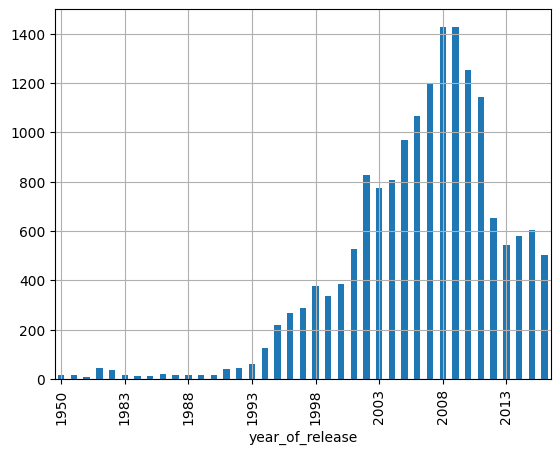

year_of_release
1950      17
1977      17
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      18
1990      16
1991      41
1992      43
1993      62
1994     128
1995     219
1996     266
1997     289
1998     379
1999     338
2000     384
2001     528
2002     829
2003     775
2004     808
2005     969
2006    1065
2007    1197
2008    1427
2009    1426
2010    1255
2011    1145
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

In [16]:
games_per_year=df_games.groupby("year_of_release")["name"].count()
fig, ax = plt.subplots()

games_per_year.plot(kind="bar", ax=ax)

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.grid()
plt.show()
display(games_per_year)

In [17]:
games_per_year.describe()


count      39.000000
mean      428.589744
std       454.052612
min         9.000000
25%        19.500000
50%       289.000000
75%       714.000000
max      1427.000000
Name: name, dtype: float64

Podemos ver la tendencia general de cantidad de publicaciones a lo largo de los ultimos años, al analizar el grafico podemos ver que existe la posibilidad de seguir la tendencia actual de menos juegos publicados y que haya relativamente pocos juegos en 2017.

### Plataformas relevantes
Buscaremos que plataformas tienen mas ventas, de las plataformas mas populares veremos sus ventas por año. 

Finalmente nos interesa saber que plataformas han perdido popularidad.

#### Plataformas populares 

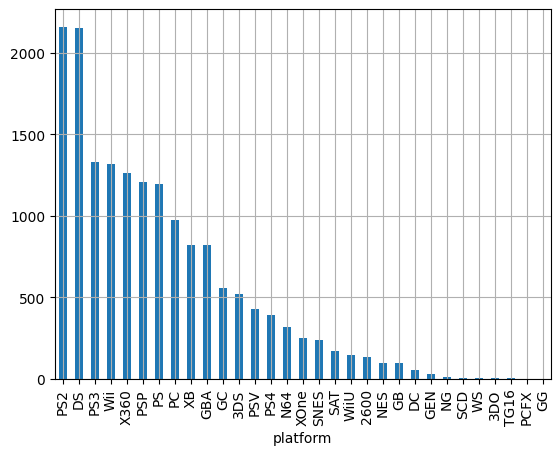

platform
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: total_sales, dtype: int64

In [18]:
games_per_platform=df_games.groupby(["platform"])["total_sales"].count()

games_per_platform.sort_values(ascending=False).plot(kind="bar")

plt.grid()
plt.show()
display(games_per_platform.sort_values(ascending=False))

Vemos que las 9 plataformas mas populares son:
- PS2     
- DS      
- PS3     
- Wii     
- X360    
- PSP     
- PS      
- PC       
- XB       
Analizaremos sus ventas en los ultimos años:

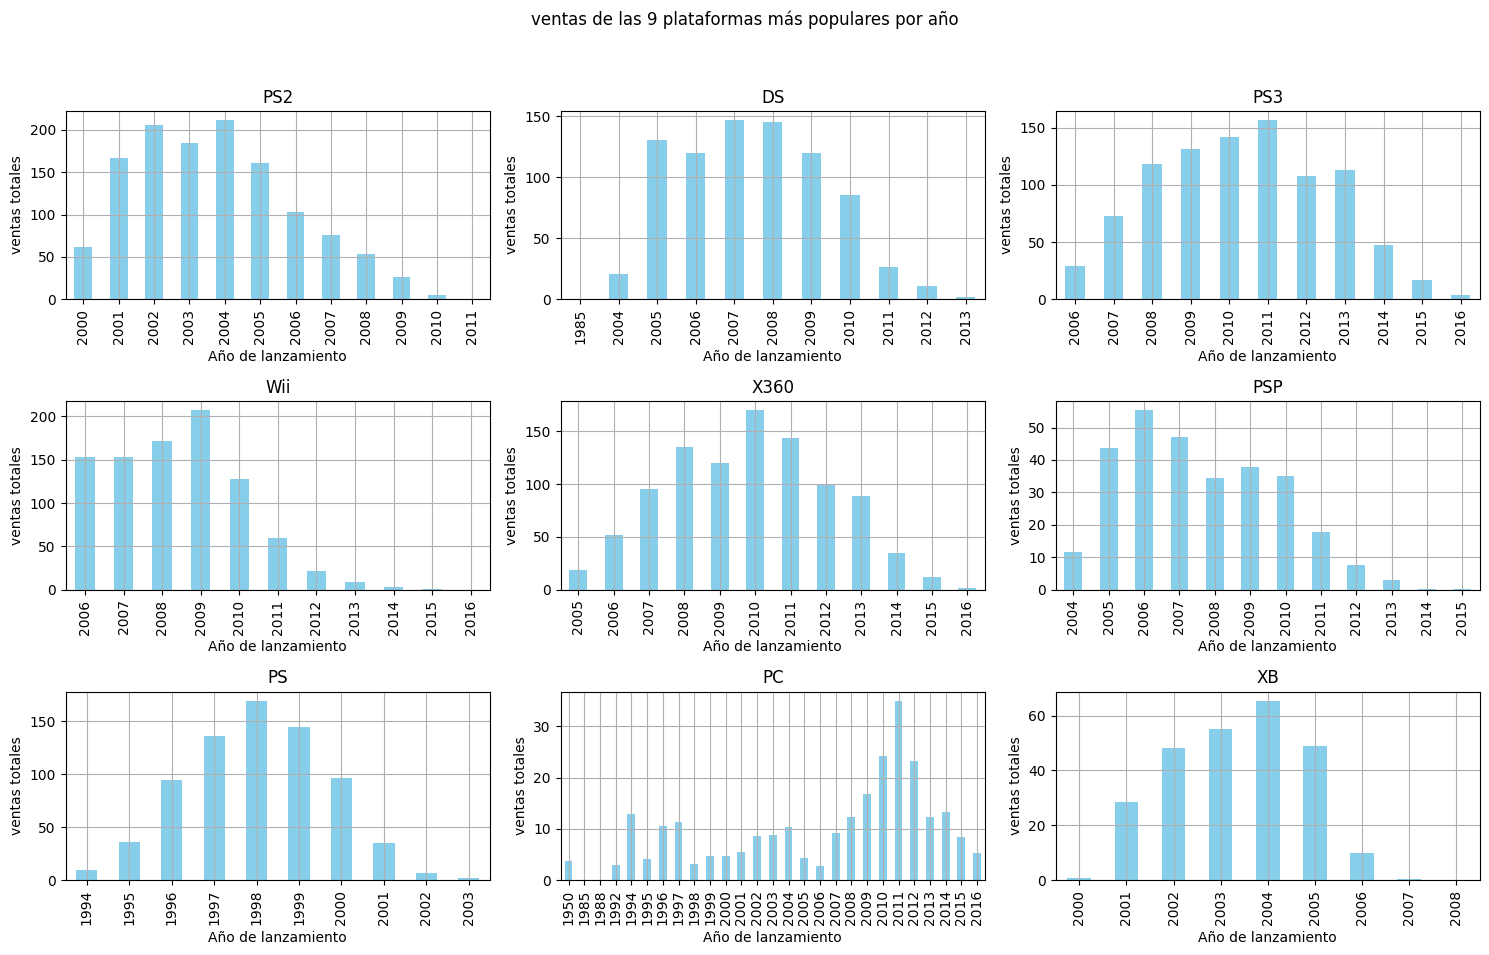

In [19]:
df_populares=df_games[df_games["platform"].isin(['PS2', 'DS', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'XB'])]
fig, axs = plt.subplots(3, 3, figsize=(15, 10))
fig.suptitle('ventas de las 9 plataformas más populares por año')

for i, plataforma in enumerate( ['PS2', 'DS', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'XB']):
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    
    datos_plataforma = df_populares[df_populares['platform'] == plataforma]
    
    conteo_por_año = datos_plataforma.groupby('year_of_release')["total_sales"].sum()
    
    conteo_por_año.plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(plataforma)
    ax.set_xlabel('Año de lanzamiento')
    ax.set_ylabel('ventas totales')
    ax.grid()

# Ajustar el espaciado entre los subgráficos
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Vemos que las consolas mas populares, a excepción de la PC, tienen un tiempo de vida aproximado de 9 años.


Por otro lado, tambien veremos las plataformas que han tenido ventas en los ultimos 3 años:

In [20]:
cantidad_por_año = df_games[df_games["year_of_release"].isin([2014, 2015, 2016])].groupby(
    ['year_of_release', 'platform'])["total_sales"].sum().unstack(fill_value=0)
display(cantidad_por_año)

ventas_por_plataforma = cantidad_por_año.sum(axis=0).sort_values(ascending=False).index
#suma_ventas_por_plataforma.sort_values(ascending=False).index

cantidad_por_año = cantidad_por_año[ventas_por_plataforma].reset_index()

# Melt para convertir el DataFrame en un formato adecuado para Plotly
df_melted = cantidad_por_año.melt(id_vars='year_of_release', var_name='Plataforma', value_name='Ventas')

fig = px.bar(cantidad_por_año, x='year_of_release', y=ventas_por_plataforma, title='Plataformas presentes en los últimos 3 años',
             labels={'year_of_release': 'Año de lanzamiento', 'value': 'Ventas totales', 'variable': 'Plataforma'},
             barmode='group')
fig.update_layout(bargap=0.15) 
fig.show()



platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
still_popular=[]
for element in ['PS2', 'DS', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'XB']:
    if element in["PS4","XOne","3DS","PS3","X360","WiiU","PC","PSV"	"Wii","PSP"]:
        still_popular.append(element)
print(still_popular)

['PS3', 'X360', 'PSP', 'PC']


De estos ultimos dos graficos podemos obtener bastante información respecto a las consolas con mas ventas y las consolas mas populares hoy en dia.
- La mayoria de las plataformas mas populares (5/9) no presenta ventas hoy en dia.
- La plataforma mas popular en los ultimos 3 años está en el lugar numero 14 de consolas mas populares.
- Las plataformas mas populares que siguen en venta hoy en dia se venden menos del 50% que la mas popular de los ultimos 3 años.
- La plataforma PC ha tenido ventas estables por decadas.
- las consolas mas populares, a excepción de la PC, tienen un tiempo de vida aproximado de 9 años.

In [ ]:
df_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,E,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,E,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,E,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,E,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01


#### Plataformas presentes a lo largo de los años
Buscamos presentar los periodos en los que las distintas plataformas han estado activas en el mercado:

In [ ]:
platform_company = {
    'PS2': 'Sony',
    'Wii': 'Nintendo',
    '2600': 'otro',
    'X360': 'Microsoft',
    'GBA': 'Nintendo',
    'PC': 'otro',
    'PS3': 'Sony',
    'PS': 'Sony',
    'PSP': 'Sony',
    'XB': 'Microsoft',
    'GB': 'Nintendo',
    'DS': 'Nintendo',
    'GC': 'Nintendo',
    '3DS': 'Nintendo',
    'N64': 'Nintendo',
    'PSV': 'Sony',
    "XOne":"Microsoft",
    "PS4":"Sony",
    "WiiU":"Nintendo"
}

company_colors = {
    'Nintendo': 'red',
    "Sony" : "blue",
    "Microsoft":"green",
    "otro":"gray"
}

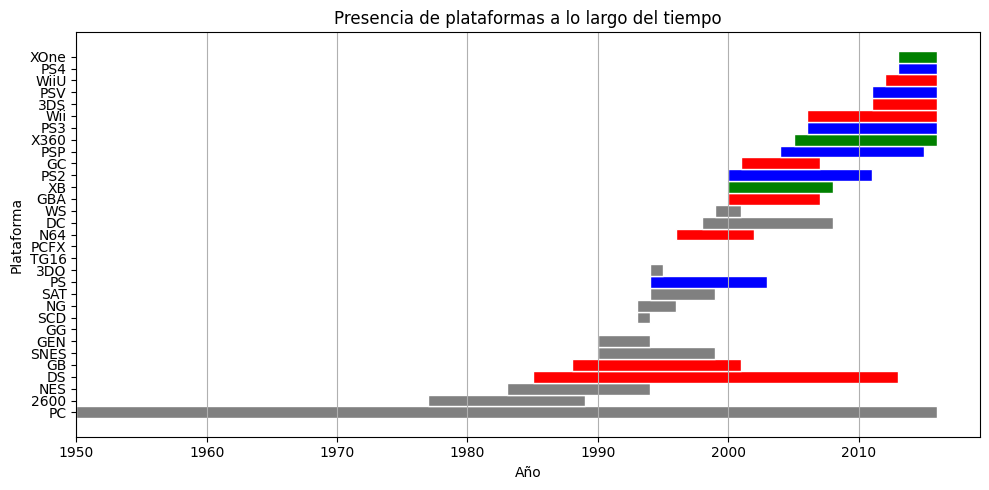

In [ ]:
platform_years = df_games.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index()
platform_years = platform_years.sort_values(by='min')
platform_years=platform_years.join(games_per_platform,on="platform")

fig, ax = plt.subplots(figsize=(10, 5))

for i, row in platform_years.iterrows():
    consola = row['platform']
    año_inicial = row['min']
    año_fin = row['max']
    
    compañia = platform_company.get(consola, 'Otra')
    color = company_colors.get(compañia, 'gray')
    #print(company,color)

    ax.barh(y=consola, width=año_fin-año_inicial, left=año_inicial, height=1, color=color, edgecolor='white')

# Ajustes del gráfico
ax.set_xlabel('Año')
ax.set_ylabel('Plataforma')
ax.set_title('Presencia de plataformas a lo largo del tiempo')

plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [ ]:
#. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
durations = [(x['max'] - x['min']) for x in platform_years.to_dict('records')]
pd.DataFrame(durations).describe()

,0
count,31.000000
mean,8.838710
std,11.975243
min,0.000000
25%,3.000000
50%,6.000000
75%,10.500000
max,66.000000


Mientras que las plataformas mas populares tienen un ciclo de alrededor de 9 años, el grueso de las plataformas tiene una mediana de 6 años.

Por lo tanto trabajaremos con datos de los ultimos 6 años.

Analizaremos las plataformas en circulación para determinar en que parte de su cliclo de relevancia estan y eligiremos aquellas que luscan relevantes.



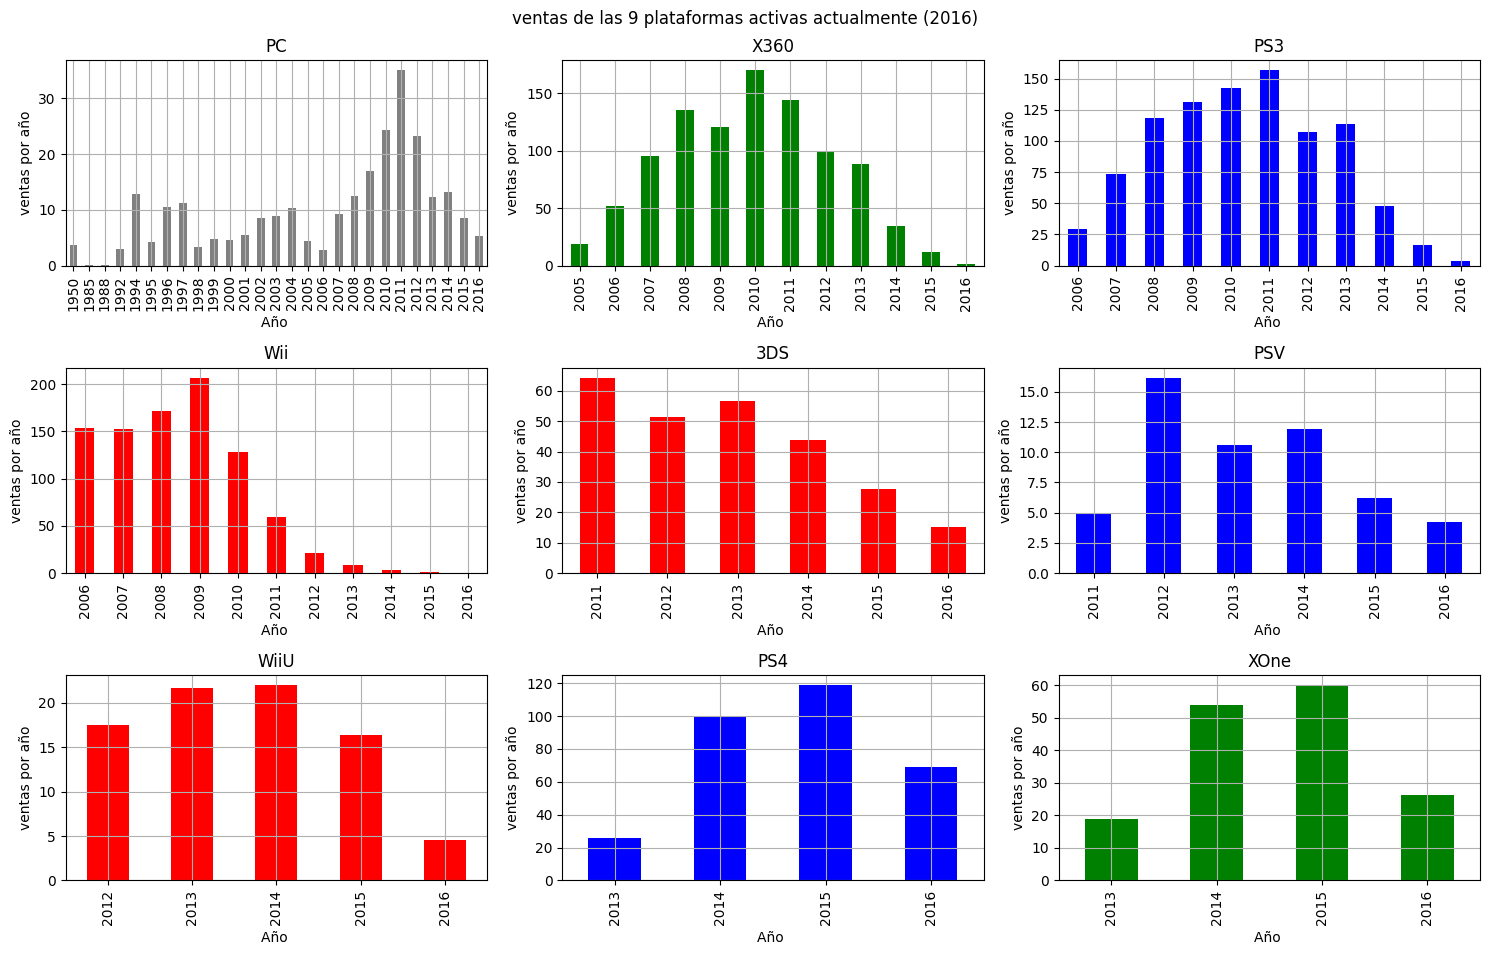

In [ ]:
pre=platform_years[platform_years["max"].isin([2016])]["platform"]
#display(pre)
df_recientes=df_games[df_games["platform"].isin(pre.to_list())]


fig, axs = plt.subplots(3, 3, figsize=(15, 10))
fig.suptitle('ventas de las 9 plataformas activas actualmente (2016)')

for i, plataforma in enumerate( pre):
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    
    datos_plataforma = df_recientes[df_recientes['platform'] == plataforma]
    
    conteo_por_año = datos_plataforma.groupby('year_of_release')["total_sales"].sum()
    
    color_compañia = company_colors[platform_company[plataforma]]

    conteo_por_año.plot(kind='bar', ax=axs[i // 3, i % 3], color=color_compañia)
    #conteo_por_año.plot(kind='bar', ax=ax, color='blue')
    ax.set_title(plataforma)
    ax.set_xlabel('Año ')
    ax.set_ylabel('ventas por año')
    ax.grid()

plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.show()

En las plataformas que se encuentran en circulación, podemos dividirlas en aquellas que estan completando su ciclo de ventas, aquellas que estan a medio ciclo y las que estan a menos de la mitad, aquellas consolas terminando su ciclo son:


- Xbox 360 (X360)
- Play Station 3 (PS3)
- Wii


Consolas que estan a mediados de su ciclo:


- Nintendo 3DS (3DS)
- Play Station Vita (PSV)


Consolas en la primer mitad de su ciclo:


- WiiU
- Play Station 4 (PS4)
- Xbox One (XOne)

- Al igual que la PC que siempre es relevante


**Consideramos que solo las consolas en las ultimas dos categorias deberian ser prioritarias**

A partir de ahora solo usaremos estas plataformas en el analisis

In [30]:
df_games_filtrado = df_games[df_games['platform'].isin(['3DS', 'PSV', 'WiiU', 'PS4', 'XOne',"PC"])].reset_index()
df_games_filtrado["user_score"]=(df_games_filtrado["user_score"].astype(float))
df_games_filtrado

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,E,14.63
1,33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,E,14.60
2,40,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,82.0,E,12.65
3,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,83.0,M,12.62
4,47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,E,11.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2705,16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,E,0.01
2706,16705,15 Days,PC,2009,Adventure,0.00,0.01,0.00,0.00,63.0,58.0,E,0.01
2707,16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,E,0.01
2708,16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,E,0.01


#### Ventas globales por plataforma

Buscaremos diferencias entre las ventas por plataforma.

Primero crearemos un dataframe que nos desglose las ventas por plataforma.

In [31]:
df_ventas_por_consola = df_games_filtrado.groupby(['name', 'platform'])['total_sales'].sum()
df_ventas_por_consola = df_ventas_por_consola.unstack()
#df_ventas_por_consola = df_ventas_por_consola.reset_index()
df_ventas_por_consola=df_ventas_por_consola.fillna(0)
df_ventas_por_consola["Total"]=(df_ventas_por_consola["3DS"]+df_ventas_por_consola["PS4"]+df_ventas_por_consola["PC"]+
                                df_ventas_por_consola["PSV"]+df_ventas_por_consola["WiiU"]+df_ventas_por_consola["XOne"])
df_ventas_por_consola=df_ventas_por_consola.sort_values(by="name")
df_ventas_por_consola

platform,3DS,PC,PS4,PSV,WiiU,XOne,Total
name,,,,,,,
Beyblade Burst,0.03,0.00,0.00,0.00,0.0,0.0,0.03
Fire Emblem Fates,1.67,0.00,0.00,0.00,0.0,0.0,1.67
Frozen: Olaf's Quest,0.59,0.00,0.00,0.00,0.0,0.0,0.59
Haikyu!! Cross Team Match!,0.04,0.00,0.00,0.00,0.0,0.0,0.04
007: Quantum of Solace,0.00,0.02,0.00,0.00,0.0,0.0,0.02
...,...,...,...,...,...,...,...
Zyuden Sentai Kyoryuger: Game de Gaburincho!!,0.05,0.00,0.00,0.00,0.0,0.0,0.05
[Prototype 2],0.00,0.11,0.00,0.00,0.0,0.0,0.11
htoL#NiQ: The Firefly Diary,0.00,0.00,0.00,0.01,0.0,0.0,0.01


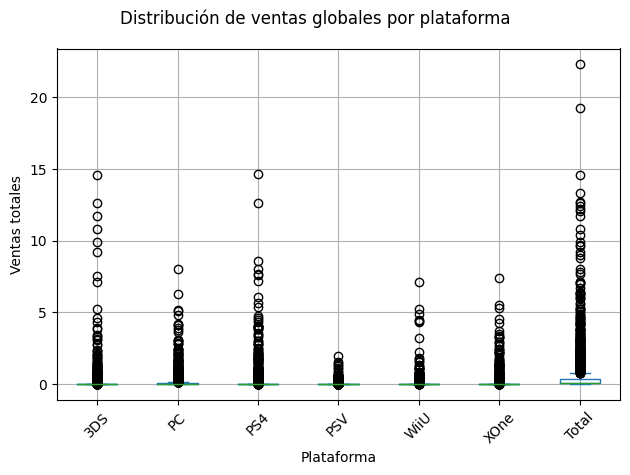

In [32]:
df_ventas_por_consola.plot(kind='box', rot=45)

# Customize the plot
plt.suptitle('Distribución de ventas globales por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales')
plt.grid(True)
plt.tight_layout()

plt.show()

array([[<Axes: title={'center': '3DS'}>, <Axes: title={'center': 'PC'}>,
        <Axes: title={'center': 'PS4'}>],
       [<Axes: title={'center': 'PSV'}>,
        <Axes: title={'center': 'WiiU'}>,
        <Axes: title={'center': 'XOne'}>],
       [<Axes: title={'center': 'Total'}>, <Axes: >, <Axes: >]],
      dtype=object)

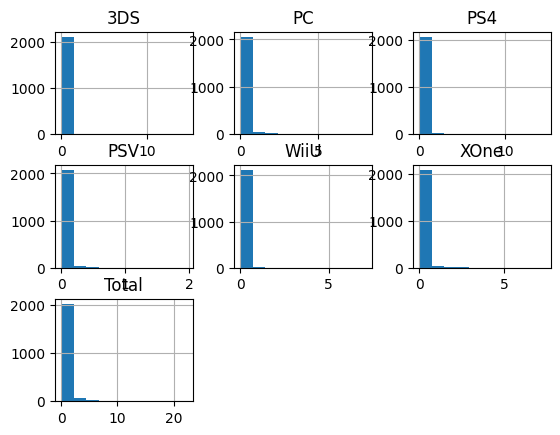

In [33]:
 df_ventas_por_consola.hist()

Notamos que la gran mayoria de juegos venden pocas unidades y aquellos juegos de altas ventas se pueden considerar atipicos.

Buscamos graficas que hagan enfasis en la venta total, el promedio y la mediana de ventas por plataforma.

<Axes: xlabel='platform'>

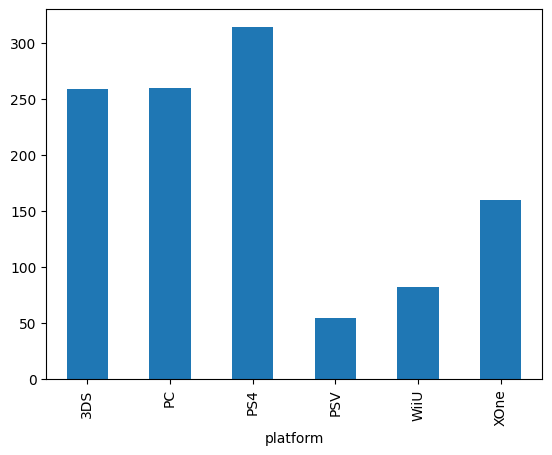

In [34]:
df_games_filtrado.groupby("platform")["total_sales"].sum().plot(kind="bar")

<Axes: xlabel='platform'>

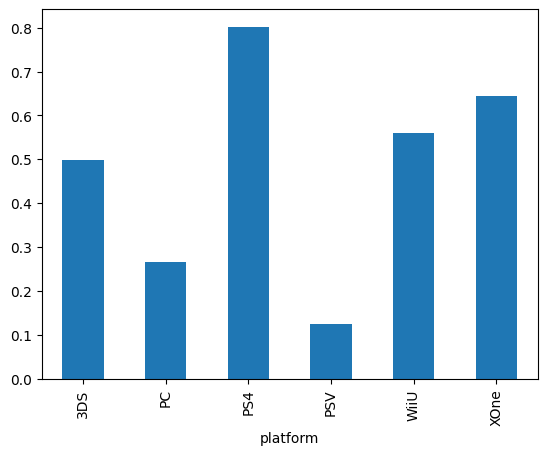

In [35]:
df_games_filtrado.groupby("platform")["total_sales"].mean().plot(kind="bar")

<Axes: xlabel='platform'>

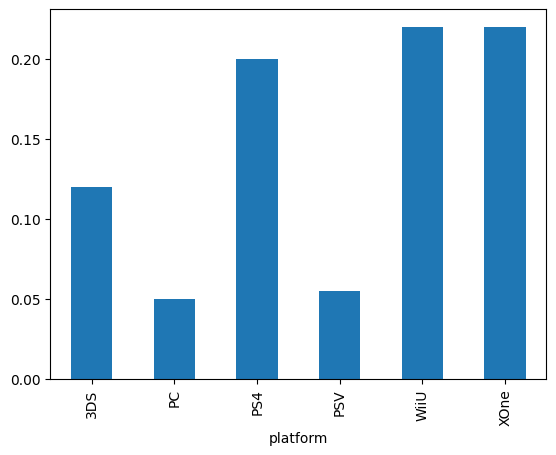

In [36]:
df_games_filtrado.groupby("platform")["total_sales"].median().plot(kind="bar")

Notamos que el promedio y media de ventas son relativamente bajos, es decir, la mayoria de los juegos tienen ventas de menos de medio millon y son las excepciones las que tienen ventas altas.

Por otro lado, vemos dos tendencias principalmente, aquellos promedios que rondan 0.20 millones de ventas y aquellos que venden menos.

Finalmente podemos ver como plataformas como PS4 tienen alta venta total y alta venta promedio, pero no tan alta media de venta, esto nos indica que aquellos titulos exitosos suben ampliamente el promedio y el total, caso contrario con WIIU y XOne que tienen una media mayor.

### Influencia de la critica

Buscamos relacionar las ventas con las criticas de usuarios y profesionales:

<Axes: xlabel='critic_score', ylabel='total_sales'>

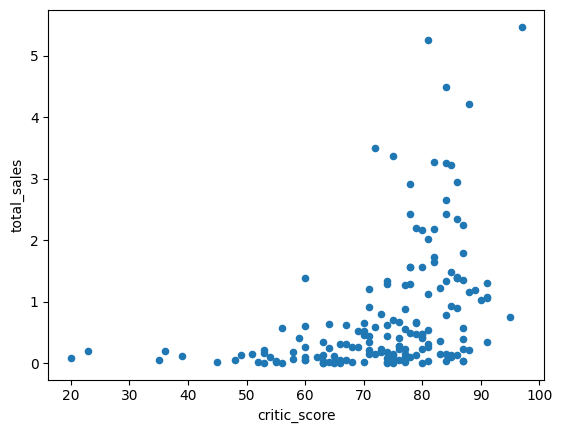

In [37]:
df_games_filtrado[df_games_filtrado["platform"]=="XOne"].plot(
    kind="scatter",
    x="critic_score",
    y="total_sales"
)

In [38]:
print((df_games_filtrado[df_games_filtrado["platform"]=="XOne"])["critic_score"].corr(
    (df_games_filtrado[df_games_filtrado["platform"]=="XOne"])['total_sales']))


0.4169983280084017


<Axes: xlabel='user_score', ylabel='total_sales'>

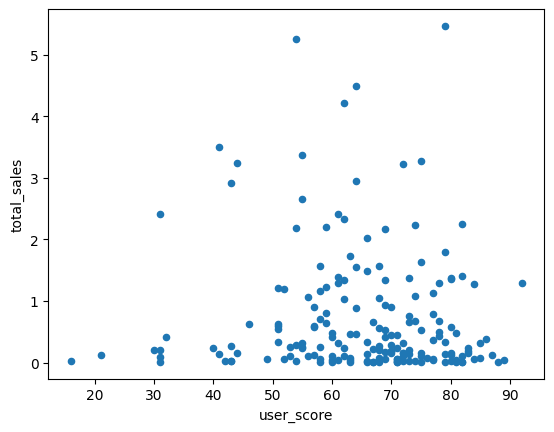

In [39]:
df_games_filtrado[df_games_filtrado["platform"]=="XOne"].plot(
    kind="scatter",
    x="user_score",
    y="total_sales"
)

In [40]:
print((df_games_filtrado[df_games_filtrado["platform"]=="XOne"])["user_score"].corr(
    (df_games_filtrado[df_games_filtrado["platform"]=="XOne"])['total_sales']))


-0.0689250532827942


Notamos que existe una correlación positiva entre las criticas profesionales y las ventas, caso contrario con las criticas del publico.

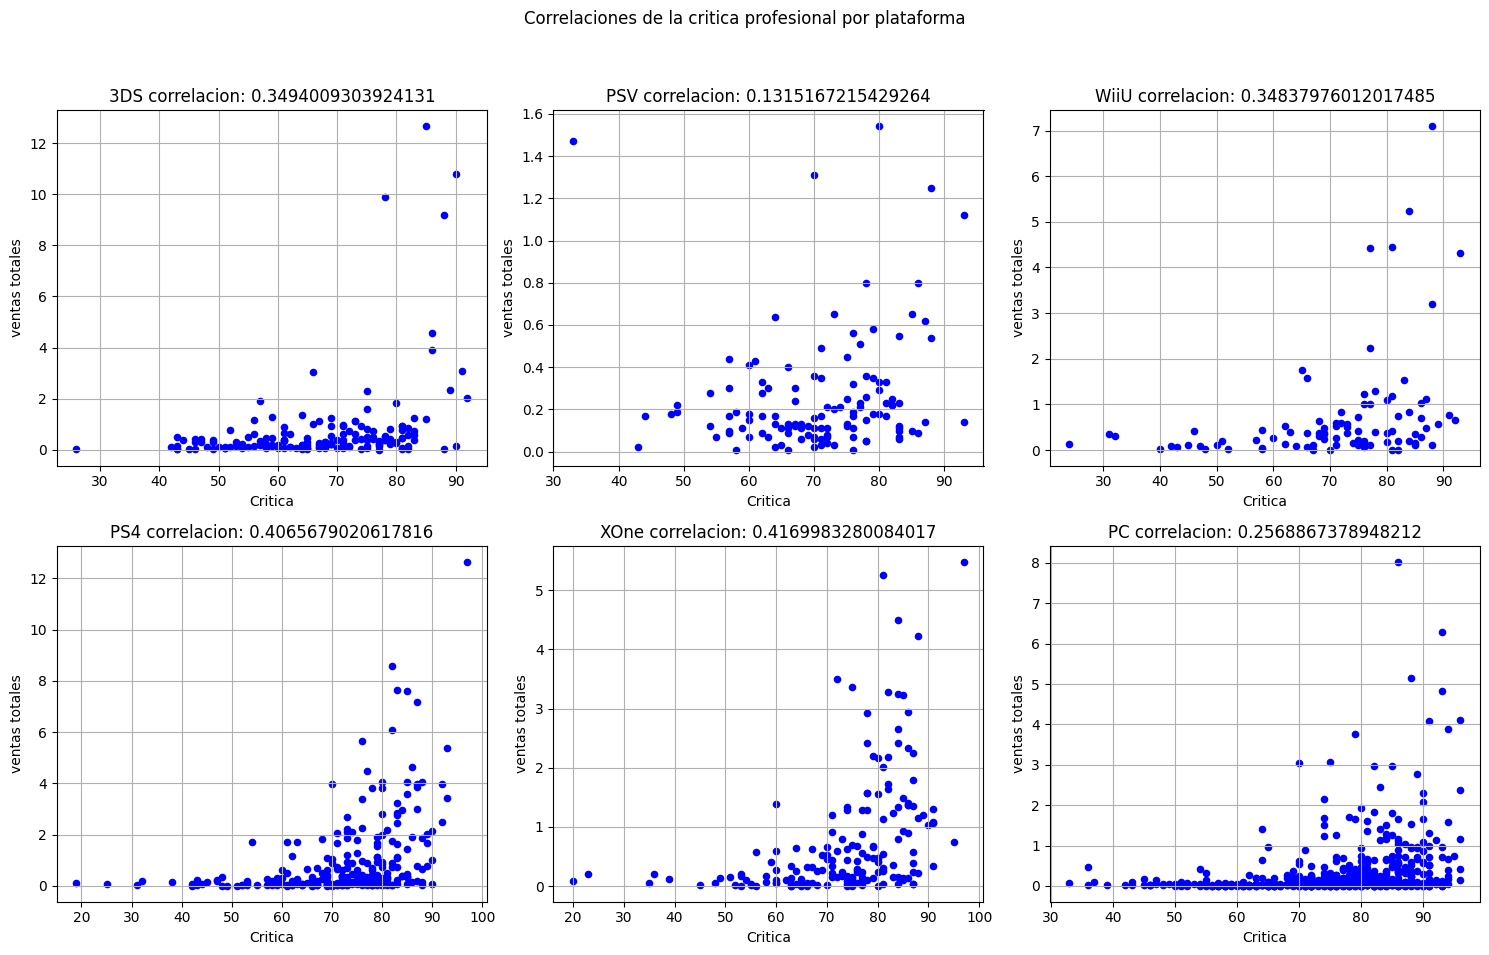

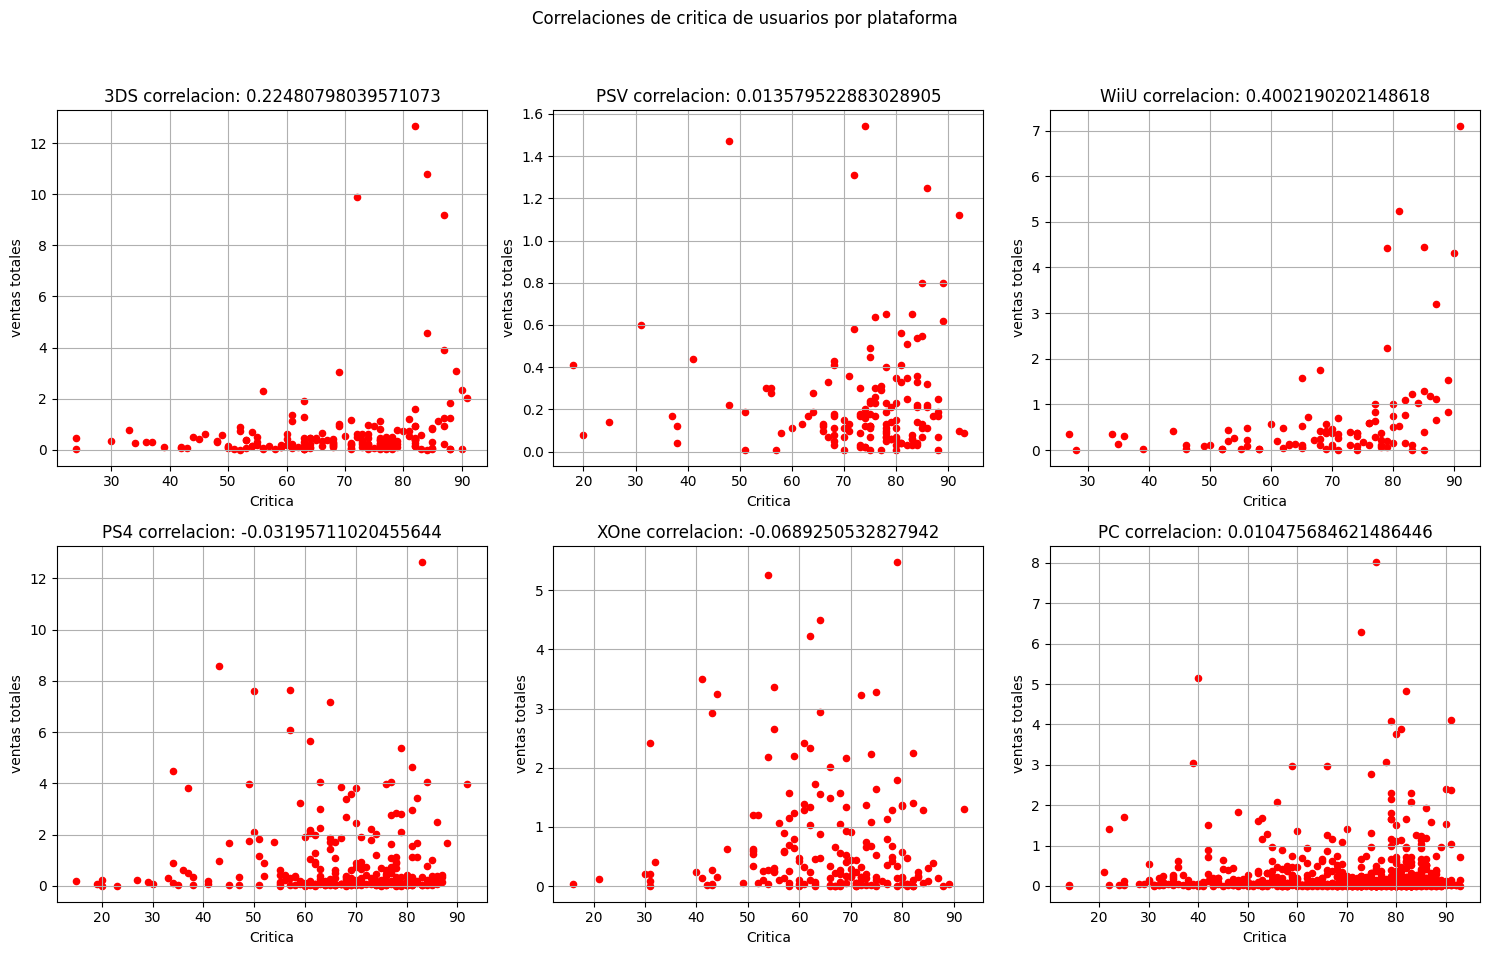

In [41]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Correlaciones de la critica profesional por plataforma')

for i, plataforma in enumerate( ['3DS', 'PSV', 'WiiU', 'PS4', 'XOne',"PC"]):
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    
    datos_plataforma = df_games_filtrado[df_games_filtrado['platform'] == plataforma]
        
    datos_plataforma.plot(
    kind="scatter",
    x="critic_score",
    y="total_sales",
    ax=ax,
    color="blue"
    )
    ax.set_title(plataforma+" correlacion: "+ df_games_filtrado[df_games_filtrado["platform"]==plataforma]["critic_score"].corr(
    (df_games_filtrado[df_games_filtrado["platform"]==plataforma])['total_sales']).astype(str)
                )
    ax.set_xlabel('Critica')
    ax.set_ylabel('ventas totales')
    ax.grid()


# Ajustar el espaciado entre los subgráficos
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Correlaciones de critica de usuarios por plataforma')

for i, plataforma in enumerate( ['3DS', 'PSV', 'WiiU', 'PS4', 'XOne',"PC"]):
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    
    datos_plataforma = df_games_filtrado[df_games_filtrado['platform'] == plataforma]
        
    datos_plataforma.plot(
    kind="scatter",
    x="user_score",
    y="total_sales",
    ax=ax,
    color="red")
    ax.set_title(plataforma+" correlacion: "+ df_games_filtrado[df_games_filtrado["platform"]==plataforma]["user_score"].corr(
    (df_games_filtrado[df_games_filtrado["platform"]==plataforma])['total_sales']).astype(str)
                )
    ax.set_xlabel('Critica')
    ax.set_ylabel('ventas totales')
    ax.grid()

    

# Ajustar el espaciado entre los subgráficos
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


De forma general podemos decir que la critica profesional esta mas relacionada con las altas ventas y que la de los usuarios incluso puede indicar bajas ventas, apuntando a juegos de nicho.

### Generos mas populares:

Buscaremos los generos que tengan mas y menos ventas

•	Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?


In [42]:
df_games_filtrado.groupby("genre")["total_sales"].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,800.0,0.324125,0.767559,0.01,0.0300,0.10,0.2900,12.62
Adventure,241.0,0.116058,0.302974,0.01,0.0200,0.03,0.0800,2.81
Fighting,66.0,0.467273,1.140856,0.01,0.0700,0.12,0.3050,7.55
Misc,163.0,0.319202,0.662103,0.01,0.0300,0.09,0.3000,4.42
Platform,82.0,0.801220,1.778744,0.01,0.0600,0.16,0.6275,10.81
Puzzle,53.0,0.150943,0.319551,0.01,0.0200,0.04,0.1000,1.78
Racing,125.0,0.410320,1.345224,0.01,0.0300,0.08,0.2500,12.65
Role-Playing,350.0,0.533543,1.354527,0.01,0.0500,0.12,0.3900,14.60
Shooter,251.0,0.820120,1.617993,0.01,0.0400,0.18,0.7150,14.63


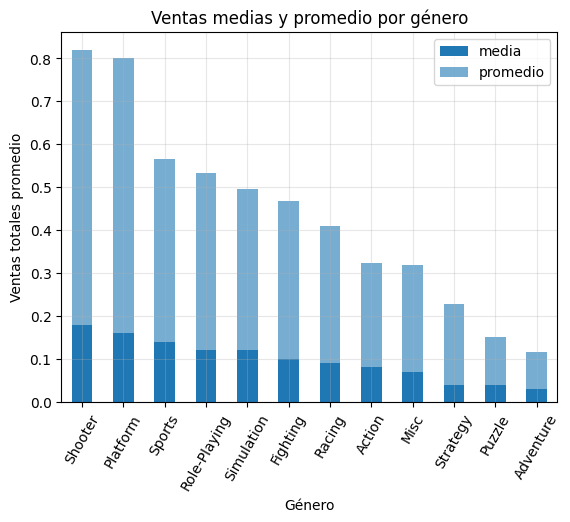

In [43]:
df_games_filtrado.groupby("genre")["total_sales"].median().sort_values(ascending=False).plot(kind="bar")
df_games_filtrado.groupby("genre")["total_sales"].mean().sort_values(ascending=False).plot(kind="bar", alpha=0.6)

plt.title("Ventas medias y promedio por género")
plt.xlabel("Género")
plt.ylabel("Ventas totales promedio")
plt.xticks(rotation=60)
plt.legend(["media","promedio"])
plt.grid(alpha=0.3)
plt.show()


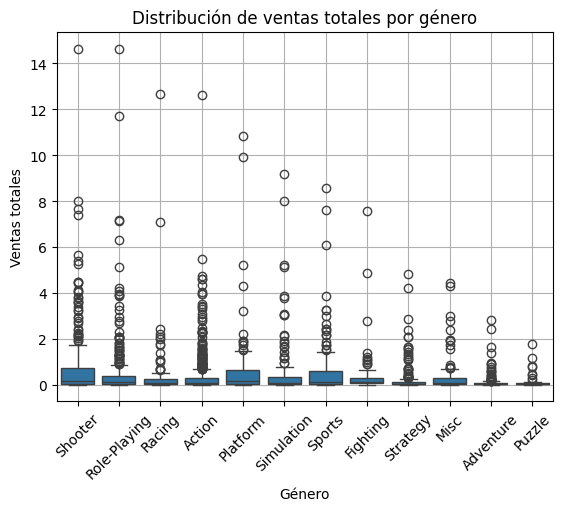

In [44]:
sns.boxplot(
    x = "genre",
    y = "total_sales",
    showmeans=False,  # Mostrar la media como un diamante
    data=df_games_filtrado.sort_values(by="total_sales",ascending=False)
)

plt.title("Distribución de ventas totales por género")
plt.xlabel("Género")
plt.ylabel("Ventas totales")

plt.xticks(rotation=45)
plt.grid()
plt.show()

Tanto los datos atipicos como las medias y promedios indican que los juegos de disparos "shooters" son los mas populares.
Despues de ello "plataformas" y "deportes" tienen mas ventas en promedio. Finalmente Puzzle y Adventure son los menos populares.

### En resumen:

- Distribución de juegos lanzados por año.

    *Hubo un maximo en 2008, se esperan alrededor de 600 juegos en estos años.*
    
    
- ¿Que plataformas son relevantes hoy en dia?

  *Podemos afirma que el PS4, XOne y 3DS son las plataformas mas relevantes de estos ultimos años, pero Wii, PSVita y PC son candidatos a considerar.*
  
  
- ¿durante que periodo una plataforma suele ser relevante?

     *Las plataformas tienen entre 6 y 10 años de relevancia.*
     
     
- El periodo apropiado para realizar las predicciones para 2017.

    *El periodo es de 10 años*
    
    
    
- Plataformas potencialmente rentables.

    *Aquellas que presentan mayor potencial son PS4, XOne y WiiU*
    
    
- ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
    
    *Entre 6 y 10 años*
    
    
- ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

    *Los lideres en ventas como PS2 ya no estan en circulación, por ello dentro de las plataformas que se encuentran en circulación, podemos dividirlas en aquellas que estan completando su ciclo de ventas, aquellas que estan a medio ciclo y las que estan a menos de la mitad, aquellas consolas terminando su ciclo son:*


    - Xbox 360 (X360)
    - Play Station 3 (PS3)
    - Wii


    Consolas que estan a mediados de su ciclo:
    

    - Nintendo 3DS (3DS)
    - Play Station Vita (PSV)


    Consolas en la primer mitad de su ciclo y potencialmente rentables:


    - WiiU
    - Play Station 4 (PS4)
    - Xbox One (XOne)
    
    - Al igual que la PC que siempre es relevante

    
- Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.
   
    *Notamos como PS4 tiene una mayor cantidad de ventas a lo largo de los años, sin embargo tiene una media de ventas menor a XOne y WiiU, esto nos indica que PS4 tiene ventas muy altas en pocos titulos mientras xone y wiiu tienen ventas medio altas en una mayor cantidad de titulos.*
    
    
- Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

     *Notamos que las reseñas de la critica se relacionan de forma positiva con la cantidad de ventas, caso contrario con las reseñas de usuarios donde no parece haber correlación, sin embargo las altas calificaciones de usuarios a juegos poco vendidos pueden indicar juegos de nicho y areas de oportunidad.*


- Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

    *Tanto los datos atipicos como las medias y promedios indican que los juegos de disparos "shooters" son los mas populares. Despues de ello "plataformas" y "deportes" tienen mas ventas en promedio. Finalmente Puzzle y Adventure son los menos populares.*

## Perfiles de regiones:

Procederemos a hacer un analisis enfocado a cada región, usando las plataformas escogidas en la sección anterior.

Buscaremos las plataformas mas populares en cada región, tanto de las preseleccionadas como en general para asegurar que no haya diferencia.

In [45]:
region_dataframes = {"eu_sales":None, "na_sales":None, "jp_sales":None, "other_sales":None}
cols = ["eu_sales", "na_sales", "jp_sales", "other_sales"]
for col in  cols:
    
    df_filtered = df_games_filtrado[df_games_filtrado[col] > 0]
    df_region = df_filtered.copy()
    region_dataframes[col]=(df_region)

print(region_dataframes)

{'eu_sales':       index                                       name platform  \
0        31                  Call of Duty: Black Ops 3      PS4   
1        33                        Pokemon X/Pokemon Y      3DS   
2        40                               Mario Kart 7      3DS   
3        42                         Grand Theft Auto V      PS4   
4        47  Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS   
...     ...                                        ...      ...   
2697  16681                                    Worms 2       PC   
2700  16690                             Pony Friends 2       PC   
2701  16692          Metal Gear Solid V: Ground Zeroes       PC   
2704  16702                    STORM: Frontline Nation       PC   
2706  16705                                    15 Days       PC   

      year_of_release         genre  na_sales  eu_sales  jp_sales  \
0                2015       Shooter      6.03      5.86      0.36   
1                2013  Role-Playing      5.2

### Plataformas principales

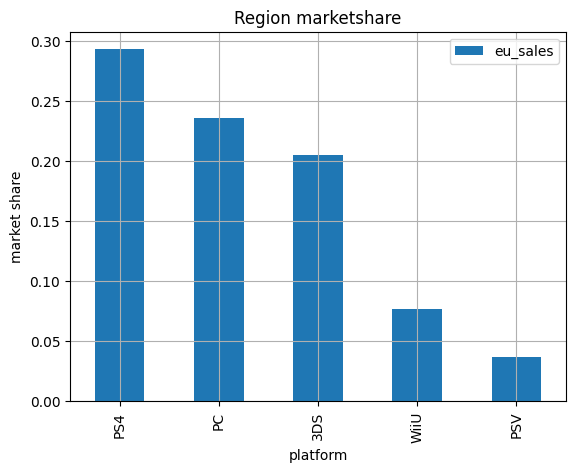

platform
PS4     0.293173
PC      0.235880
3DS     0.205435
WiiU    0.076774
PSV     0.036932
Name: total_sales, dtype: float64

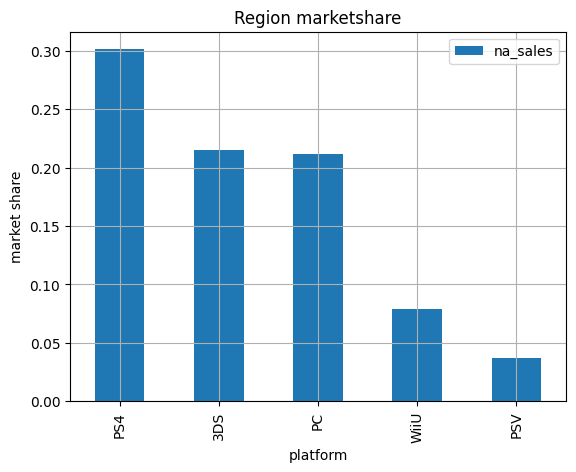

platform
PS4     0.301227
3DS     0.214908
PC      0.211460
WiiU    0.079157
PSV     0.037482
Name: total_sales, dtype: float64

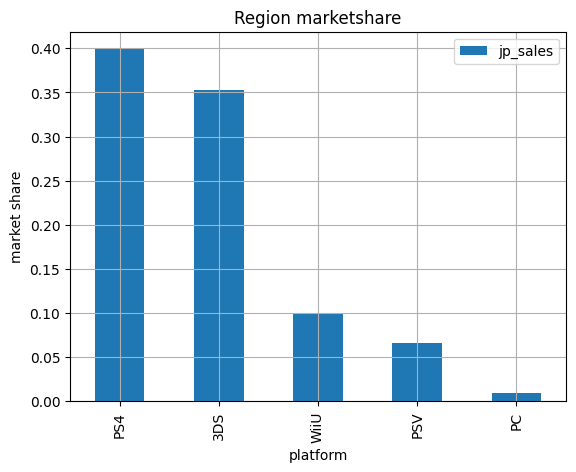

platform
PS4     0.398850
3DS     0.353342
WiiU    0.099569
PSV     0.066380
PC      0.009788
Name: total_sales, dtype: float64

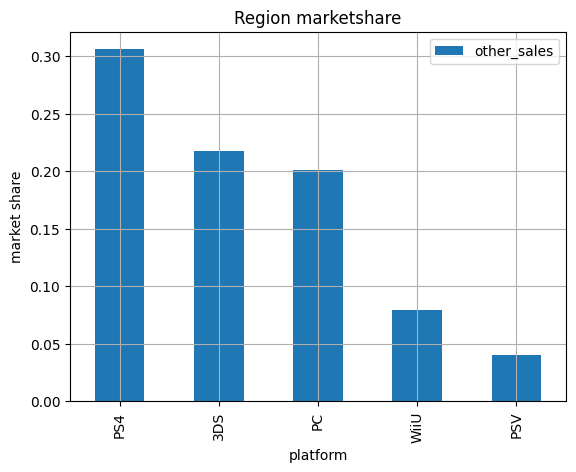

platform
PS4     0.305851
3DS     0.217250
PC      0.201431
WiiU    0.079383
PSV     0.040175
Name: total_sales, dtype: float64

In [46]:
for item in cols:
    total_region=region_dataframes[item].groupby(["platform"])["total_sales"].sum().sum()
    market_share_region=((region_dataframes[item].groupby(["platform"])["total_sales"].sum())/total_region).head(5)

    market_share_region.sort_values(ascending=False).plot(kind="bar")
    plt.legend([item])
    plt.title("Region marketshare")
    plt.grid()
    plt.ylabel("market share")
    plt.show()
    display(market_share_region.sort_values(ascending=False))

Notamos que PS4 es en toda región la principal consola.

### Generos principales

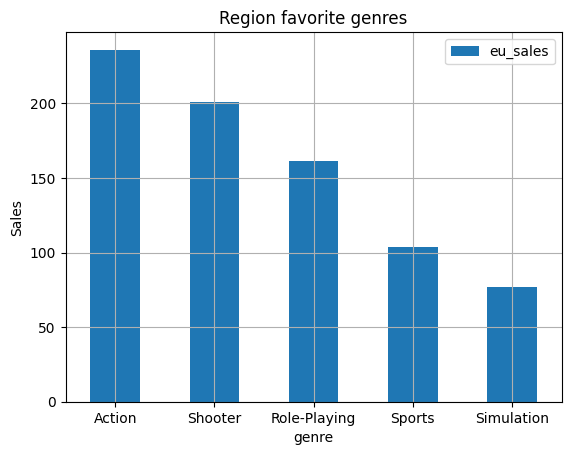

genre
Action          235.98
Shooter         200.92
Role-Playing    161.31
Sports          103.70
Simulation       76.67
Platform         65.12
Racing           50.60
Strategy         47.54
Misc             44.33
Fighting         29.58
Adventure        22.48
Puzzle            6.92
Name: total_sales, dtype: float64

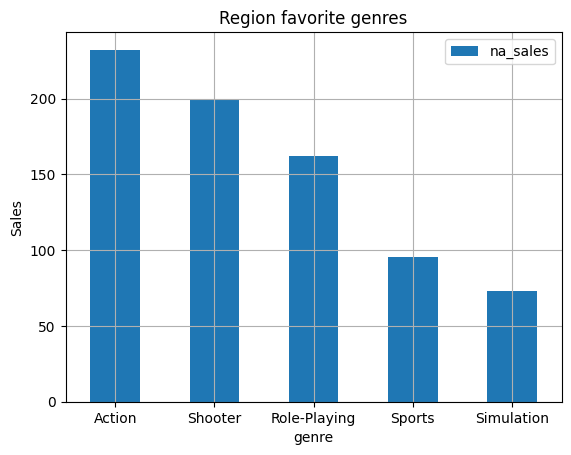

genre
Action          232.18
Shooter         199.58
Role-Playing    162.20
Sports           95.78
Simulation       72.92
Platform         65.26
Racing           48.52
Misc             45.76
Strategy         42.45
Fighting         29.54
Adventure        20.56
Puzzle            6.01
Name: total_sales, dtype: float64

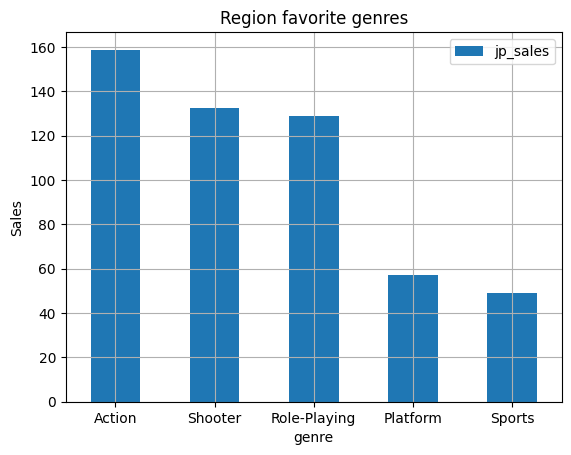

genre
Action          158.76
Shooter         132.61
Role-Playing    128.92
Platform         57.04
Sports           49.14
Racing           39.18
Misc             28.78
Simulation       26.13
Fighting         22.32
Adventure        11.82
Puzzle            6.33
Strategy          3.03
Name: total_sales, dtype: float64

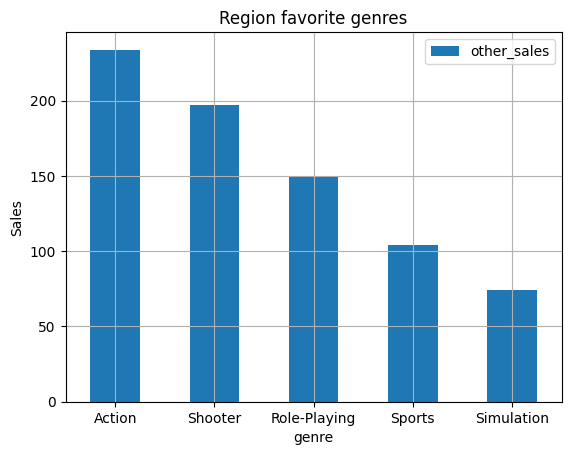

genre
Action          233.89
Shooter         197.12
Role-Playing    149.41
Sports          103.98
Simulation       74.07
Platform         65.24
Racing           50.49
Misc             43.39
Strategy         38.55
Fighting         30.06
Adventure        18.77
Puzzle            7.09
Name: total_sales, dtype: float64

In [47]:
for item in cols:
    genres_region=(region_dataframes[item].groupby(["genre"])["total_sales"].sum())

    genres_region.sort_values(ascending=False).head(5).plot(kind="bar",rot=0)
    plt.legend([item])
    plt.title("Region favorite genres")
    plt.grid()
    plt.ylabel("Sales")
    plt.show()
    display(genres_region.sort_values(ascending=False))

### Relación con el rating de la ESRB

Buscamos una relación numerica entre el rating y la cantidad de ventas, para ello veremos la distribución de juegos publicados bajo los distintos ratings y la compararemos con la cantidad de ventas.

In [48]:
for item in cols:
    display(region_dataframes[item]["rating"].unique(),
             pd.concat([region_dataframes[item].groupby("rating")[item].sum(), region_dataframes[item].groupby("rating")[item].count()], axis=1).reset_index())

array(['E', 'M', 'T', 'E10+', 'K-A', 'RP'], dtype=object)

,rating,eu_sales,eu_sales
0,E,186.23,776
1,E10+,37.51,260
2,K-A,0.11,2
3,M,131.22,425
4,RP,0.08,3
5,T,79.70,466


array(['E', 'M', 'T', 'E10+', 'K-A', 'EC'], dtype=object)

,rating,na_sales,na_sales
0,E,185.62,562
1,E10+,46.56,232
2,EC,0.09,2
3,K-A,2.30,1
4,M,123.50,334
5,T,72.49,318


array(['E', 'M', 'T', 'E10+'], dtype=object)

,rating,jp_sales,jp_sales
0,E,117.72,715
1,E10+,8.32,66
2,M,9.45,109
3,T,16.57,150


array(['E', 'M', 'T', 'E10+', 'RP'], dtype=object)

,rating,other_sales,other_sales
0,E,44.44,581
1,E10+,10.50,220
2,M,36.30,351
3,RP,0.01,1
4,T,19.52,332


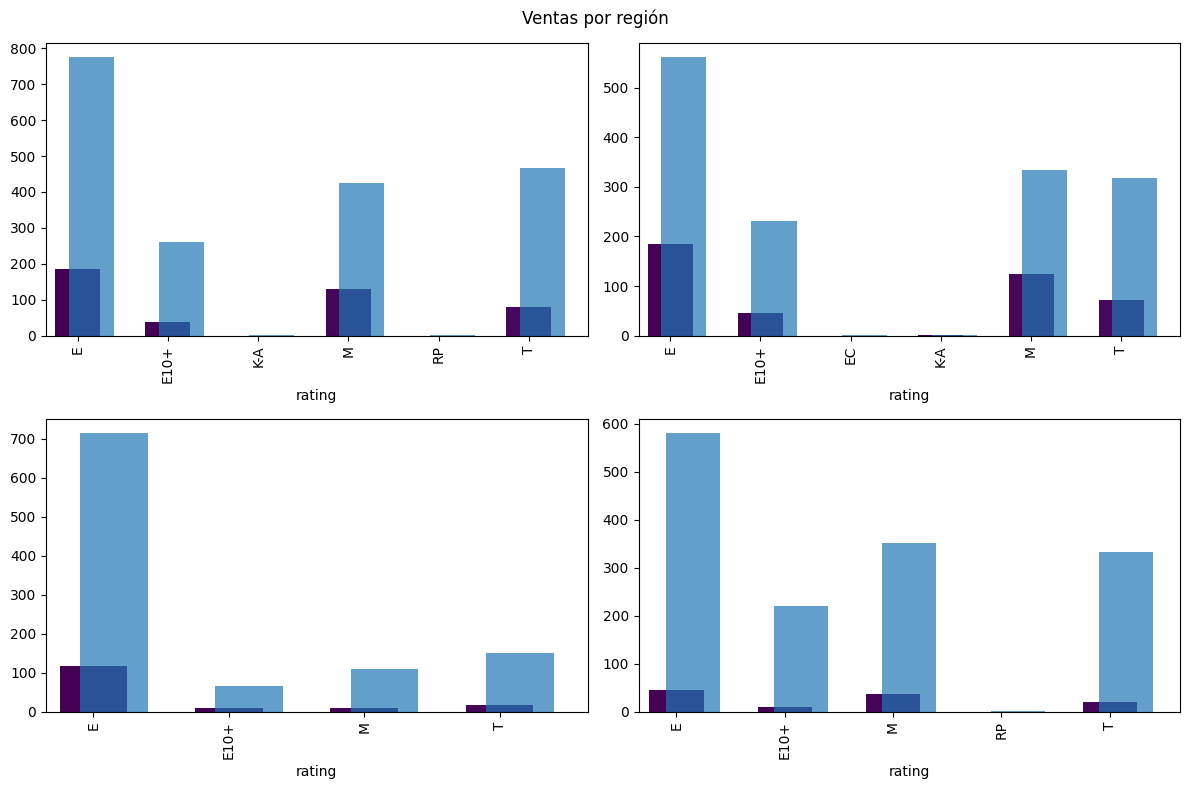

In [49]:
#Arreglar grafico, extraer numeros y sacar razones para determinas si el rating afecta.

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
row_index = 0
col_index = 0

for item in cols:  
  region_dataframes[item].groupby("rating")[item].sum().plot(
      kind="bar",
      ax=axes[row_index, col_index],
      x="rating",
      y=item,
  #    label=item,
      color=plt.cm.viridis.colors

  )  
  region_dataframes[item].groupby("rating")[item].count().plot(
      kind="bar",
      ax=axes[row_index, col_index],
      x="rating",
      y=item,
#      label=item,
      alpha=0.7,
      position=0.2
      
  )
  
  col_index += 1
  if col_index > 1:
      col_index = 0
      row_index += 1

        
#lt.legend()        
plt.suptitle("Ventas por región")

plt.tight_layout()

plt.show()

## Hipotesis y comprobaciones
Procederemos a comprobar multiples hipotesis sobre nuestros datos.

###  Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Compararemos los promedios y haremos una prueba P, *nuestra hipotesis nula es que no hay diferencia entre las calificaciones*, *hipotesis alternativa indica que las medias de PC y XOne son diferentes.*


La formulación de las hipotesis deriva de la definición de las hipotesis, donde la hipotesis nula es aquella donde se mantiene un caso default o no hay información releveante al contrario de la hipotesis alternativa, la cual afirma que si existe algun evento de interes, en este caso, que las calificaciones son diferentes; esto concuerda con la *prueba t* a usar.

La *prueba t* a usar retorna la probabilidad de que dos distribuciones se originen de la misma población con cierta media.

In [50]:


df_xone = df_games_filtrado[df_games_filtrado["platform"] == "XOne"]
df_pc = df_games_filtrado[df_games_filtrado["platform"] == "PC"]

alpha=0.05
for item in["critic_score","user_score"]:
    results=st.ttest_ind(df_xone[item].dropna(),
                 df_pc[item].dropna(),
                 equal_var =False)

    print('valor p:',results.pvalue) 

    if (results.pvalue<alpha):
        print("Rechazamos la hipótesis nula para",item)
    else:
        print("No podemos rechazar la hipótesi1s nula para",item)


valor p: 0.01676445953904435
Rechazamos la hipótesis nula para critic_score
valor p: 4.935072360183449e-06
Rechazamos la hipótesis nula para user_score


En ambos casos, calificaciónes de la critica y de los usuarios, rechazamos la hipotesis nula, sugiriendo que las medias son estadisticamente diferentes.

### las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
Compararemos los promedios y haremos una prueba P, *nuestra hipotesis nula es que no hay diferencia entre las calificaciones*, *hipotesis alternativa indica que las medias de acción y deportes son diferentes.*

La hipotesis nula y alternativa se elaboran de la misma forma que en el caso anterior y se usa la misma prueba T.

In [51]:

df_deportes = df_games_filtrado[df_games_filtrado["genre"] == "Sports"]
df_accion = df_games_filtrado[df_games_filtrado["genre"] == "Action"]
#display(df_deportes,df_accion)
alpha=0.05
for item in["critic_score","user_score"]:
    results=st.ttest_ind(df_deportes[item].dropna(),
                 df_accion[item].dropna(),
                 equal_var =False)

    print('valor p:',results.pvalue) 

    if (results.pvalue<alpha):
        print("Rechazamos la hipótesis nula para",item)
    else:
        print("No podemos rechazar la hipótesis nula para",item)


valor p: 0.43283631412368606
No podemos rechazar la hipótesis nula para critic_score
valor p: 1.436524866628437e-11
Rechazamos la hipótesis nula para user_score


En este caso las para las calificaciones de la critica especializada no podemos rechazar la hipotesis nula, es decir, no podemos afirmar que las calificaciones son diferentes.

Caso contrario con las calificaciones de los usuarios, pues al rechazar la hipotesis nula, podemos afirmar que las calificaciones son diferentes.


## Conclusión:


Podemos señalar multiples predicciones, es probable que 2017 tenga ventas similares o mas bajas a 2016 como se señala en la sección #3, por lo que se sugiere apuntar a plataformas relevantes como *PlayStation 4, PC, Xbox One  y WiiU*, concentrando esfuerzos en generos populares como: *action, shooter, platform y sports*, de preferencia con un rating de la ESRB de "Everyone" o "Teens".

Por ultimo, señalamos que las calificaciones de la critica para PC y Xone son diferentes, por otro lado, la critica de usuarios  da diferentes calificaciones a los juegos de deportes que a los de acción, caso contrario con las calificaciones de la critica especializada.